<img src="Images/Logo.png" alt="Logo NSI" style="float:right">

<h1 style="text-align:center">Chapitre 13 : Apprentissage et algorithme des plus proches voisins</h1>

Les algorithmes traidtionnels visent à apporter efficacement des réponses correctes à des problèmes précisément définis.  
Les algorithmes à base d'**apprentissage** suivent une philosophie différente : approter une réponse plausible, mais pas nécessairement exacte, à un problème auquel il est difficile d'appliquer un algorithme traditionnel.

Le problème visé peut typiquement :
* être d'une complexité telle que le calcul d'une réponse exacte prendrait beaucoup trop de temps (par exemple, le choix du meilleur coup à jouer dans une partie de Go).
* ne pas avoir de définition précise (par exemple, le choix de la meilleure traduction en français d'une phrase en langue étrangère).
* être basé sur des données incomplètes ou imprécises (par exemple, le choix de la meilleure publicité à montrer à un utilisateur d'internet en fonction de ses goûts et de son humeur du moment).

Pour répondre à de tels problèmes, les algorithmes d'apprentissage ont besoin d'une grande quantité d'exemples associant des données d'entrée et les réponses attendues, dont ils se servent pour essayer de deviner une réponse convenable lorsqu'on leur propose de nouvelles données d'entrées.

## Carte scolaire
La [carte scolaire](https://www.education.gouv.fr/le-fonctionnement-de-la-carte-scolaire-dans-le-second-degre-11555) a pour vocation d'amener chacun à une école ou un lycée proche de son domicile.  
Pour autant, nous ne sommes pas systématiquement affectés à l'établissement le plus proche. D'autres facteurs comme les différentes capacités d'accueil des établissements et les données démographiques des quartiers pouvant intervenir pour équilibrer la répartition globale.  
La sectorisation est néanmoins basée sur des zones géographiques, et on peut donc avoir une idée de ce que sont les établissements de secteur pour une adresse donnée en sondant le voisinage (la réponse définitive étant disponible auprès du rectorat ou de la mairie).

Voici les résultats d'un tel sondage sur un quartier dans lequel les élèves se répartissent dans trois écoles.

<center><img src="Images/plus_proches_voisins-1.png" alt="Plus proches voisins"></center>

Chaque point correspond au domicile d'un élève sondé et est rouge, vert ou bleu en fonction de l'école du secteur.

Peut-on prédire la **sectorisation** d'une adresse `a` quelconque à l'intérieur de cette grande zone?  
Ce problème, qui demande de déterminer à quelle **catégorie**, ou **classe** appartient un élément donné, est appelé **probème de classification**.

Lorsque l'on dispose d'informations complètes sur les différentes classes à distinguer, on peut espérer résoudre ce problème de classification de manière exacte.  
Ici cependant, nous ne connaissons pas le découpage précis de notre carte scolaire et ne pouvons nous baser que sur les quelques données collectées par notre sondage.  
L'**algorithme des *k* plus proches voisins** présenté ici permet d'associer une classe *plausible* à l'adresse considérée en analysant les classes des points connus qui en sont le plus proches.

## Classification avec l'algorithme des voisins
Un problème de classification s'exprime dans le contexte suivant :
* on a un ensemble $C$ de classe
* on a un ensembme $E$ d'éléments
* chaque élément $e$ de $E$ est associé à exactement une classe $c(e)$ de $C$

L'objectif est alors de produire un algorithme qui, pour chaque élément $e$ de $E$ détermine sa classe $c(e)$.  

Dans ce contexte, l'algorithme des plus proches voisins s'applique quand :
* on n'a pas de manière efficace de calculer exactement $c(e)$
* on dispose d'une table $T$ d'associations correctes entre des éléments $e_i$ et leur classe $c(e_i)$
* on dispose d'une notion de **distance** sur l'ensemble $E$, c'est-à-dire d'une fonction `dist` qui, à une paire d'éléments de $E$ associe un nombre réel positif ou nul mesurant la différence entre les deux éléments (la fonction doit donner des valeurs proches de zéro si les deux éléments sont très proches l'un de l'autre, et de grandes valeurs s'ils sont très différents).

L'algorithme dépend également d'un paramètre $k$, qui est un nombre entier strictement positif indiquant le nombre de données à prndre en compte lors d'une recherche.

Tous ces éléments étant fixés, l'algorithme des $k$ plus proches voisins prend en entrée un élément $e$ de $E$, et renvoie une classe $c$ de $C$ pour laquelle il est plausible, au vu des associations connues dans $T$ que $c$ soit égale à $c(e)$.

L'algorithme procède ainsi :
1. Chercher parmi les éléments présents dans la table $T$ les $k$ éléments ayant les plus faibles distances à $e$
2. Collecter les classes associées à ces $k$ éléments
3. déterminer la classe la plus souvent présente parmi les classe retenues

Le résultat est la classe déterminée à la dernière étape.  
En cas d'égalité de distance ou de nombre d'occurences, l'algorithme peut choisir n'importe quelle réponse parmi les ex-aequo.

#### Réponse exacte
On sous-entend également une condition supplémentaire dans la description de l'algorithme : si l'élément examiné est déjà présent dans la table $T$, alors la réponse donnée doit être excatement celle qui était présente dans $T$.

### Problème de sectorisation
Pour appliquer l'algorithme des plus proches voisins à notre problème de sectorisation :
* On considère trois classes qui sont les trois couleurs rouge, vert et bleu.  
* On considère comme éléments l'ensemble des positions à l'intérieur du grand cercle.
* On définit la fonction `dist` comme la distance géographique usuelle entre deux positions de la classe $c(e)$ associée à un élément $e$ comme la couleur de l'école de secteur d'un élève dont le domicile est à la position $e$.
* On ne sait pas déterminer $c(e)$ de manière certaine pour chaque position $e$, mais on peut construire une table $T$ contenant les résultats du sondage couplés aux données géographiques du domicile de chaque répondant.

Dans un premier temps, fixons pour $k$ la valeur 3.

|                   position $a$                   |                   position $b$                   |                   position $c$                   |
|:------------------------------------------------:|:------------------------------------------------:|:------------------------------------------------:|
| ![position a](Images/plus_proches_voisins-2.png) | ![position b](Images/plus_proches_voisins-3.png) | ![position c](Images/plus_proches_voisins-4.png) |
| 3 voisins : ![bleu](Images/plus_proches_voisins-bleu.png) ![bleu](Images/plus_proches_voisins-bleu.png) ![bleu](Images/plus_proches_voisins-bleu.png)                                   | 3 voisins :  ![bleu](Images/plus_proches_voisins-bleu.png) ![rouge](Images/plus_proches_voisins-rouge.png) ![rouge](Images/plus_proches_voisins-rouge.png)                                    | 3 voisins :  ![vert](Images/plus_proches_voisins-vert.png) ![vert](Images/plus_proches_voisins-vert.png)  ![rouge](Images/plus_proches_voisins-rouge.png)                                   |
| résultat : ![bleu](Images/plus_proches_voisins-bleu.png)                                       | resultat : ![rouge](Images/plus_proches_voisins-rouge.png)                                      | resultat : ![vert](Images/plus_proches_voisins-vert.png)                                     |


#### Influence du paramètre $k$
La réponse de l'algorithme est susceptible de changer si l'on utilise d'autres valeurs pour le paramètre $k$.

|                       $k=1$                      |                       $k=5$                      |
|:------------------------------------------------:|:------------------------------------------------:|
| ![position a](Images/plus_proches_voisins-5.png) | ![position b](Images/plus_proches_voisins-6.png) |
| a :![bleu](Images/plus_proches_voisins-bleu.png) | a : ![bleu](Images/plus_proches_voisins-bleu.png) ![bleu](Images/plus_proches_voisins-bleu.png) ![bleu](Images/plus_proches_voisins-bleu.png) ![bleu](Images/plus_proches_voisins-bleu.png) ![rouge](Images/plus_proches_voisins-rouge.png) |
| b :![bleu](Images/plus_proches_voisins-bleu.png) | b : ![bleu](Images/plus_proches_voisins-bleu.png) ![rouge](Images/plus_proches_voisins-rouge.png)  ![rouge](Images/plus_proches_voisins-rouge.png)  ![bleu](Images/plus_proches_voisins-bleu.png) ![rouge](Images/plus_proches_voisins-rouge.png)                                             |
| c :![vert](Images/plus_proches_voisins-vert.png) | c : ![vert](Images/plus_proches_voisins-vert.png) ![vert](Images/plus_proches_voisins-vert.png) ![rouge](Images/plus_proches_voisins-rouge.png) ![rouge](Images/plus_proches_voisins-rouge.png)  ![vert](Images/plus_proches_voisins-vert.png) |

Avec une petite valeur pour $k$, on effectue la classification en utilisant peu de valeurs. Cela a l'avantage de ne tenir compte que des éléments les plus proches. En revanche, un trop petit nombre de valeurs considérées augmente l'impact d'une perturbation venant d'un point très proche.  
A l'inverse, avec une grande valeur de $k$ on tient compte d'un plus grand nombre de données pour chaque classification. On diminue l'influence de chaque point individuel et les éventuelles perturbations locales. Une trop grande valeur de $k$ a aussi des défauts : on prend en compte des éléments qui peuvent être très éloignés et donc peu significatifs.

[Animation GeoGebra](https://www.geogebra.org/m/w2xuhqtt)
<div style="text-align: center">
<a href="https://www.geogebra.org/m/w2xuhqtt">
   <img border="0" alt="k plus proches voisins" src="Images/k_plus_proches voisins.png"  > 
</a>
</div>

#### Choix de $k$ par validation croisée
Les bonnes valeurs pour $k$, c'est-à-dire celles donnant les meilleures prédictions, dépendent à la fois du problème de classification considéré et du jeu de données.  
On peut déterminer empiriquement l'efficacité d'une valeur, par exemple avec des techniques de **validation croisée**.  
Cette famille de techniques utilise le tableau $T$ lui même comme base d'évaluation :
1. Retirer de $T$ un certain nombre d'éléments
2. en prenant comme jeu de données le tableau $T'$ obtenu, utiliser l'algorithme sur les éléments qui ont été retirés
3. comparer les réponses de l'algorithme avec les réponses attendues  

On peut ensuite éventuellement recommencer en retirant des éléments différents.  
Enfin ce protocole peut être appliqué avec plsieurs valeurs de $k$, pour déterminer celle donnant de meilleurs réponses.  
Cette méthode est une autre technique d'apprentissage.

#### Variante : majorité pondérée
Le principe général de l'algorithme est de ne considérer qu'un petit ensemble de données les plus proches de l'élément examiné.  
Rien n'oblige à donner à chacun des $k$ éléments retenus la même importance das l'estimation de la classe la plus plausible. Pour donner plus d'importance aux voisins proches on peut aussi utiliser une formule pondérée donnant à chacun des $k$ voisins un poids proportionnel à l'inverse de sa distance à l'élément examiné.

## Notion de distance
L'algorithme des plus proches voisins repose sur la fonction `dist` évaluant la distance, ou la proximité entre deux éléments de l'ensemble auquel on s'intéresse.  
Cette notion de distance peut couvrir plusieurs réalités selon la nature des éléments observés.

### Distances géométriques
* Lorsqu'on évalue la proximité de deux points du plan, il existe déjà une notion de distance naturelle, correspondant à la distance géométrique.  
Si les deux points $A$ et$B$ ont pour coordonnées respectives $(x_A, y_A)$ et $(x_B, y_B)$, cette **distance euclidienne** peut être exprimée, dans un repère orthonormé, par $\sqrt{(x_A-x_B)^2+(y_A-y_B)^2}$.

* Une variante appelée **distance de Manhattan** mesure la distance qu'il faudrait parcourir en ne se déplaçant que le long des arêtes d'un quadrillage généré par un repère orthonormé du plan.  
Si les deux points $A$ et$B$ ont pour coordonnées respectives $(x_A, y_A)$ et $(x_B, y_B)$, cette distance  peut être exprimée par $|x_A-x_B|+|y_A-y_B|$.

|                      distance euclidienne        |        distance de Manhattan                     |
|:------------------------------------------------:|:------------------------------------------------:|
| ![distance euclidienne](Images/distance_euclidienne.png) | ![distance de Manhattan](Images/distance_manhattan.png) |
| distance : 5                                     | distance : 7                                     |

### Distance entre chaîne de caractères
Les notions de distance ou de proximité entre deux chaîne de caractères peuvent également prendre plusieurs formes en fonction du contexte.  
* La notion la plus simple est la **distance de Hamming**, qui compte le nombre de caractères par lesquels deux chaînes diffèrent.

|      Chaîne 1      |      Chaîne 2      | Distance |
|:------------------:|:------------------:|:--------:|
| `folle à la messe` | `molle à la fesse` | 2        |
| `art`              | `arbre`            | 3        |

Cette notion n'est pas la plus pertinente si l'on veut identifier deux chaînes qui sont les mêmes "à une faute de frappe près" (une faute consistant à ajouter ou retirer un caractère, par exemple, pourra donner une distance très importante pour deux chaînes finalement très ressemblantes.

|      Chaîne 1      |      Chaîne 2      | Distance |
|:------------------:|:------------------:|:--------:|
| `canard` | `cannard` | 4        |
| `amer`              | `ramer`            | 5        |

* La **distance d'édition** donne une notion plus adapté à cette situation, en définissant la distance entre deux chaînes de caractères somme le nombre minimal d'ajouts, de suppressions et de modifications permettant de transformer l'une en l'autre.  
Ainsi, la distance d'édition entre `amer` et `ramer` est de 1 et la distance d'édition entre `amer` et `rater` est de 2 (obtenue avec l'ajout du caractère `r` en tête et la mutation du `m` en `t`.

#### Distance sémantique
Pour les distances présentées précédemment, un `chameau` est proche d'un `chapeau` mais `azur` est très éloigné de `bleu`.  
Des notions de distance basées sur le sens des mots existent, mais sont éminemment plus complexes à mettre en place.

## Limites de l'approche
L'algorithme des plus proches voisins est basé sur un principe siple qui peut facilement être appliqué à une grande variété de situations.  
D'une situation à l'autre la qualité de ses prédictions peut cependant grandement varier.

L'algorithme suppose que les données connues pour les éléments à plus faible distance d'un point observé sont représentatives de la situation de ce point. De nombreuses situations peuvent mettre cette hypothèse en défaut. Par exemple :
* être fausses
* ne pas être suffisamment nombreuses
* être trop différentes de l'élément observé pour constituer des indices pertinents
* être réparties de manière très inégale entre les différentes classes, et ainsi donner trop d'importance à certaines classes et pas assez à d'autres.

Alternativement, les sources d'imprécision peuvent être intrinsèques à un problème dans lequel les éléments proches l'un de l'autre ne sont pas forcément de la même classe.

### [Vie privée et algorithmes](https://interstices.info/les-systemes-de-recommandation-categorisation/)
Les algorithmes d'apprentissage dépendent de la qualité et de la quantité des données dont ils disposent.  

Les prédictions d'un algorithme d'apprentissage visant à présenter la bonne publicité au bon internaute, au bon moment, sont d'autant plus efficaces que l'algorithme dispose de données importantes sur :
* les profils susceptibles d'être touchés par un message donné (elles peuvent venir de données d'un site marchand sur les profils des de gens intéressés par un certain produit)
* le profil de l'utilisateur observé (elles peuvent venir d'informations "volontairement" fournies par cet utilisateur lors d'une création de compte, ou collectées plus discrètement à mesure de ses actions ou des actions de ses amis)
* les événements récents de la vie de la personne (les dernières requêtes dans un moteur de recherche et les pages visitées donnent de nombreux indices à ce propos, y compris sur des questions de santé, de famille, ...).

Par conséquent, l'intérêt économique des entreprises dans le modèle repose sur un tel algorithme est de capter autant que possible ces données utilisables.

## Estimation de prix immobiliers
Une variante du problème de la carte scolaire est celui de l'estimation des prix de l'immobilier dans un quartier donné.  
Cette fois , il n'existe pas même de source officielle arrêtant le prix du mètre carré à une adresse donnée : seul compte la somme d'un acheteur potentiel est prêt à dépenser.  

La principale information utilisable vient des ventes récentes effectivement réalisées de biens proches de celui que l'on cherche à estimer.  
L'observation de ces données montre que les prix peuvent varier fortement d'un quartier à l'autre, voire d'une rue à la rue voisine.  
La qualité de l'estimation sera donc aussi bonne que les données utilisées seront proches et nombreuses.

### Régression avec l'algorithme des voisins
Pour obtenir une estimation, on peut reprendre l'idée des plus proches voisins et consulter les $k$ ventes de même nature les plus proches du bien à estimer.  
On utilise une table de données $T$ contenant les ventes récenes et les coordonnées des biens vendus, ainsi qu'une fonction `dist` donnant, par exemple, la distance géographique.  
Le pris de vente correspond, en revanche, mal à la notion de classe : si les 5 biens les plus proches ont été vendus respectivement à 2240, 2240, 2339, 2340 et 2341 euros par mètre carré, il ne serait guère sensé de dire que le prix le plus représentatif soit 2240 euros par mètre carré (la valeur apparaît deux fois).

Par opposition au problème de classiafication vu précédemment, on a ici ce qu'on appelle un **problème de régression**, qui vise à estimer une valeur numérique en fonction d'autres valeurs numériques (dans l'exemple ci-dessus, une meilleure approche consiste à faire la moyenne des valeurs observées).

## Exemple d'implémentation
Nous allons nous baser sur le jeu de données [iris de Fisher](https://fr.wikipedia.org/wiki/Iris_de_Fisher) (il existe de nombreuses autres possibilités). 

Le jeu de données a été modifié et adapté : [lien](Donnees/iris.csv).

Nous allons utiliser 3 bibliothèques Python :
* [Pandas](https://pandas.pydata.org/) qui va nous permettre d’importer les données issues du fichier csv
* [Matplotlib](https://matplotlib.org/) qui va nous permettre de visualiser les données (tracer des graphiques)
* [Scikit-learn](https://scikit-learn.org/stable/) qui propose une implémentation de l’algorithme des k plus proches voisins.

La bibliothèque Python scikit-learn propose un grand nombre d’algorithmes lié à l’apprentissage automatique (c’est sans aucun doute la bibliothèque la plus utilisée en apprentissage automatique).  
Parmi tous ces algorithmes, scikit-learn propose l’algorithme des $k$ plus proches voisins.  

Voici un [programme Python](Scripts/knn.py) permettant d'associer à une "iris mystère" (largeur pétale = 0,75
cm ; longueur pétale = 2,5 cm) une "espèce majoritaire" parmi les k plus proches voisins.

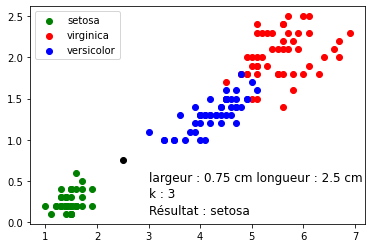

In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

#traitement CSV
iris = pandas.read_csv("Donnees/iris.csv")
x = iris.loc[:,"petal_length"]
y = iris.loc[:,"petal_width"]
lab = iris.loc[:,"species"]
#fin traitement CSV

#valeurs
longueur = 2.5
largeur = 0.75
k = 3
#fin valeurs

#graphique
plt.scatter(x[lab == 0], y[lab == 0], color='g', label='setosa')
plt.scatter(x[lab == 1], y[lab == 1], color='r', label='virginica')
plt.scatter(x[lab == 2], y[lab == 2], color='b', label='versicolor')
plt.scatter(longueur, largeur, color='k')
plt.legend()
#fin graphique

#algo knn
d = list(zip(x,y))
model = KNeighborsClassifier(n_neighbors=k)
model.fit(d,lab)
prediction = model.predict([[longueur,largeur]])
#fin algo knn

#Affichage résultats
txt = "Résultat : "
if prediction[0] == 0:
    txt = txt + "setosa"
if prediction[0] == 1:
    txt = txt + "virginica"
if prediction[0] == 2:
    txt = txt + "versicolor"
plt.text(3,0.5, f"largeur : {largeur} cm longueur : {longueur} cm", fontsize=12)
plt.text(3,0.3, f"k : {k}", fontsize=12)
plt.text(3,0.1, txt, fontsize=12)
#fin affichage résultats

plt.show()

## Exercices

### Exercice 1
Ecrire une fonction calculant la distance de Hamming entre deux chaînes de caractères.

### Exercice 2
On se donne une tableau `lexique` contenant des mots.  
Ecrire un programme qui demande un mot `m` et une distance `d` à l'utilsateur, et qui affiche l'ensemble des mots du lexique ayant une distance de Hamming à `m` inférieure ou égale à `m`.

### Exercice 3
On se donne une tableau, non vide, `lexique` contenant des mots.  
Ecrire un programme qui demande un mot `m` à l'utilsateur, et qui affiche le mot du lexique ayant avec `m` la plus faible distance de Hamming.

### Exercice 4
Ecrire une fonction prenant en paramètres deux chaînes `c` et `d` et indiquant si `c` peut être obtenue en retirant un caractère de `d`.

### Exercice 5
On sépare les points d'un segment en deux catégories (rouge ou bleu).  
On dispose de l'échantillon de points suivants.
<center><img src="Images/Exercice-1.png" alt="k plus proches voisins"></center>
Pour chacun des repères verticaux, dire si l'algorithme des $k$ plus proches voisins pour $k=3$ classe le point correspondant en rouge ou en bleu.  
En déduire les zones du segment continu dont les points sont classés en rouge ou en bleu.

### Exercice 6
On sépare les points d'une portion carrée du plan en deux catégories (rouge ou bleu).  
On dispose de l'échantillon des catégories des points de coordonnées entières, réparties comme suit :
<center><img src="Images/Exercice-2.png" alt="k plus proches voisins"></center>

1. Déterminer les régions du plan dont les points sont classés en rouge par l'algorithme des $k$ plus proches voisins, pour $k=1$ et avec la distance euclidienne.

2. Reprendre la question précedente avec $k=3$, $k=5$, $k=9$.  
Comment évolue avec les différentes valeurs de $k$ la forme de la séparation entre la zone dont les points sont classés en rouge et celle dont les points sont classés en bleu?

## Sources :
* Balabonski Thibaut, et al. 2019. *Spécialité Numérique et sciences informatiques : 30 leçons avec exercices corrigés - Première - Nouveaux programmes*. Paris. Ellipse
* Document accompagnement Eduscol : [Algorithme des k plus proches voisins](https://cache.media.eduscol.education.fr/file/NSI/76/6/RA_Lycee_G_NSI_algo_knn_1170766.pdf)
* Stanford Vision and Learning Lab : [K-Nearest Neighbors Demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)